*Poonam Ligade*

*1st Feb 2017*


----------


This notebook is like note to self.

I am trying to understand various components of Artificial Neural Networks aka Deep Learning.

Hope it might be useful for someone else here.

I am designing neural net on MNIST handwritten digits images to identify their correct label i.e number in image.

You must have guessed its an image recognition task.

MNIST is called Hello world of Deep learning.

Lets start!!

This notebook is inspired from [Jeremy's][1] [Deep Learning][2] mooc and [Deep learning with python][3] book by Keras author [François Chollet][4] .


  [1]: https://www.linkedin.com/in/howardjeremy/
  [2]: http://course.fast.ai/
  [3]: https://www.manning.com/books/deep-learning-with-python
  [4]: https://research.google.com/pubs/105096.html

**Import all required libraries**
===============================

In [1]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


test.csv
train.csv



**Load Train and Test data**
============================

In [2]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("../input/train.csv")

test_images = (pd.read_csv("../input/test.csv").values).astype('float32')

In [3]:
train_images = (train.ix[:,1:].values).astype('float32')
train_labels = train.ix[:,0].values.astype('int32')

In [4]:
train_images.shape

(42000, 784)

Lets look at 3 images from dataset with their labels.

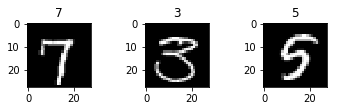

In [5]:
#Convert train datset to (num_images, img_rows, img_cols) format 

train_images = train_images.reshape(train_images.shape[0],  28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i]);

In [6]:
train_images = train_images.reshape((42000, 28 * 28))

test_images.shape

(28000, 784)

The output variable is an integer from 0 to 9. 
This is a multiclass classification problem.

In [7]:
train_labels.shape

(42000,)

In [8]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

**Preprocessing the digit images**
==================================

**Feature Standardization**
-------------------------------------

Its good to normalize pixel values.

In [9]:
train_images = train_images / 255
test_images = test_images / 255

*One Hot encoding of labels.*
-----------------------------

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension. 

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [10]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

Lets plot 10th label.

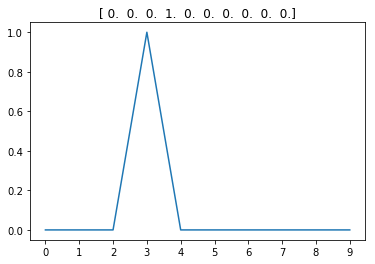

In [11]:
plt.title(train_labels[9])
plt.plot(train_labels[9])
plt.xticks(range(10));

Oh its 3 !

**Designing neural network architecture**
=========================================

In [12]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [13]:
train_images.shape

(42000, 784)

In [14]:
train_labels.shape

(42000, 10)

In [15]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

model=Sequential()
model.add(Dense(32,activation='relu',input_dim=(28 * 28)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

**Compile network**
===================

Before making network ready for training we have to make sure to add below things:

 1.  A loss function: to measure how good the network is
    
 2.  An optimizer: to update network as it sees more data and reduce loss
    value
    
 3.  Metrics: to monitor performance of network

In [16]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [17]:
history=model.fit(train_images, train_labels, validation_split = 0.05, 
            epochs=25, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 2s - loss: 0.5154 - acc: 0.8483 - val_loss: 0.3045 - val_acc: 0.9162

Epoch 2/25
39900/39900 [==============================] - 1s - loss: 0.2246 - acc: 0.9340 - val_loss: 0.2253 - val_acc: 0.9400

Epoch 3/25
10304/39900 [======>.......................] - ETA: 1s - loss: 0.1935 - acc: 0.9441

39900/39900 [==============================] - 1s - loss: 0.1788 - acc: 0.9480 - val_loss: 0.1972 - val_acc: 0.9467

Epoch 4/25
39900/39900 [==============================] - 1s - loss: 0.1520 - acc: 0.9540 - val_loss: 0.1915 - val_acc: 0.9510

Epoch 5/25
39900/39900 [==============================] - 1s - loss: 0.1339 - acc: 0.9599 - val_loss: 0.1675 - val_acc: 0.9557

Epoch 6/25
 9536/39900 [======>.......................] - ETA: 1s - loss: 0.1130 - acc: 0.9654

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

From the graphs we can see that training loss is decreasing and training accuracy is increasing slowly. Thats what we intended to do using gradient descent.
But thats not the case with validation set
after 15th epoch val_loss is increasing and val_acc is decreasing.
That is called as **overfitting**.

after the second epoch, we are over optimising on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set

To avoid this we will simply stop training after 15 epochs.

**creating model again from scratch**
=====================================

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=(28 * 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy',
 metrics=['accuracy'])

history=model.fit(train_images, train_labels, 
            epochs=15, batch_size=64)

In [ ]:
predictions = model.predict_classes(test_images, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

More to come . Please upvote if you find it useful.